In [39]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Load data</p>

In [40]:
df = pd.read_csv('../input/self-driving-cars/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
27840,1478732824471419775.jpg,133,138,139,155,1
58960,1478898551970937642.jpg,69,81,135,181,3
81449,1479500829631626226.jpg,239,255,129,141,1
120472,1479505177424600785.jpg,143,166,137,152,2
71184,1479499651550878290.jpg,175,195,143,158,1


In [38]:
classes = df.class_id.unique()
print(classes)

[1 2 3 5 4]


In [20]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Show some labeled images</p>

In [21]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = '../input/self-driving-cars/images/'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    
    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

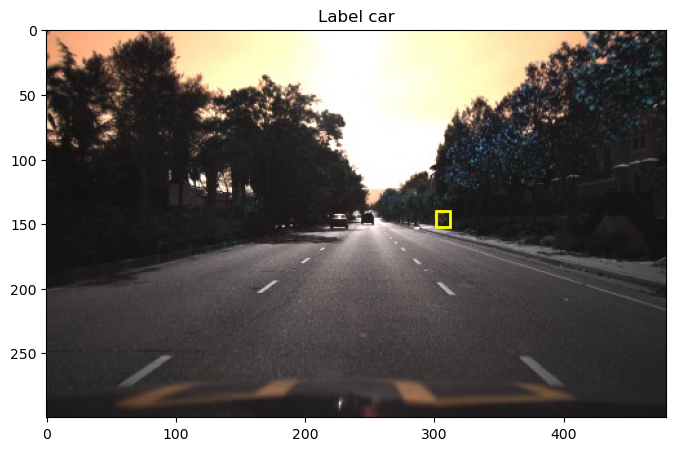

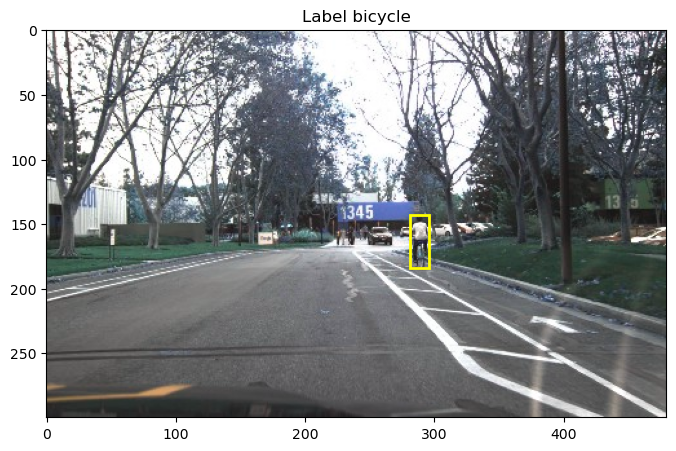

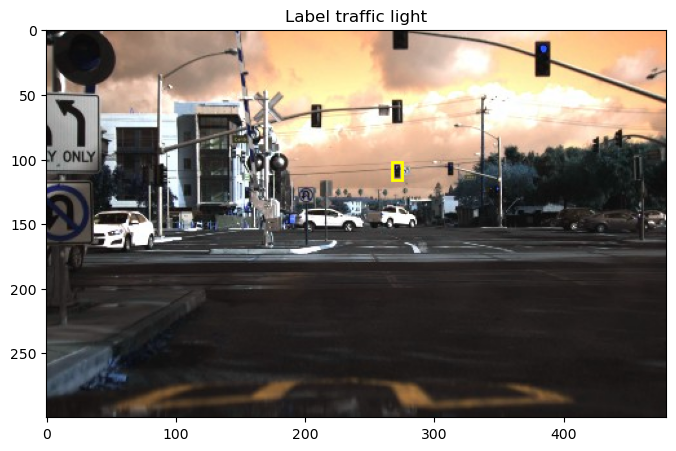

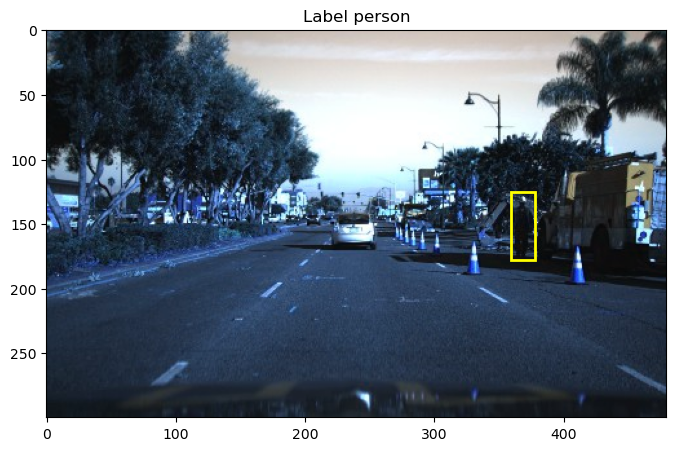

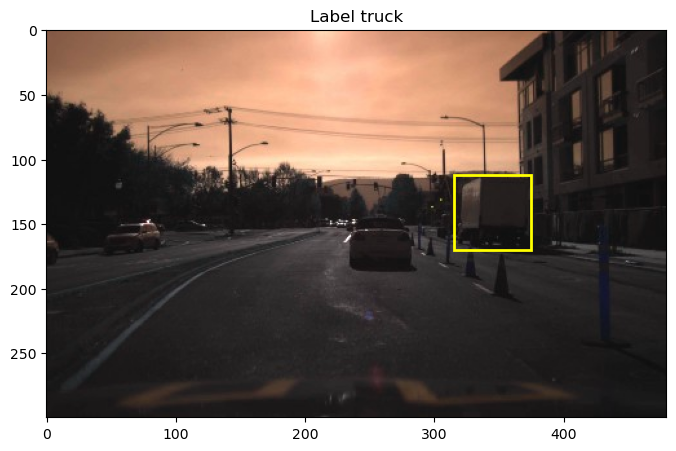

In [22]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))
    
    plt.show()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Model</p>

In [23]:
!pip install ultralytics

In [24]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display
import os 
import pathlib 

In [25]:
model = YOLO("yolov8m.pt")

In [26]:
results=model.predict(source="/kaggle/input/self-driving-cars/images/1478019956680248165.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /kaggle/input/self-driving-cars/images/1478019956680248165.jpg: 416x640 1 car, 1 truck, 686.4ms
Speed: 2.8ms preprocess, 686.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


In [27]:
result = results[0]
box = result.boxes[0]

In [28]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [30]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.68826293945312, 148.7809295654297, 162.10047912597656]
Probability: 0.7161698937416077


In [31]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [34]:
results1 = model.predict(source="/kaggle/input/self-driving-cars/images/1478019952686311006.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 /kaggle/input/self-driving-cars/images/1478019952686311006.jpg: 416x640 1 person, 2 cars, 680.7ms
Speed: 3.1ms preprocess, 680.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


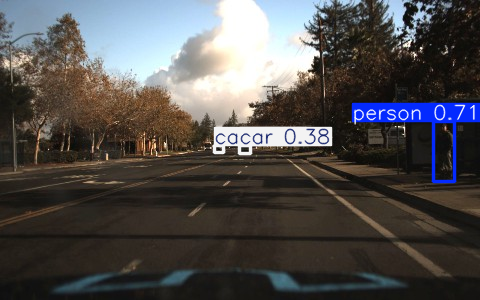

In [35]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))